<h1>Viscosity Model</h1>
<p>This file present the developed alorithm and model for viscosity of Athabasca Bitumen samples. The data of all 3 samples has been given to the model.</p>

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

title_font = {'fontname':'Arial', 'size':'22', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'18'}

<h2>Read viscosity data</h2>

In [11]:
df = pd.read_csv('Viscosity.csv')
display(df.head())
print('Size the table:', df.shape)

,IBP,MW,T,P,Viscosity
0,192.4,539.2,190.4,2.01,11.8
1,192.4,539.2,175.5,2.01,16.2
2,192.4,539.2,151.6,2.02,32.2
3,192.4,539.2,127.1,1.99,72.8
4,192.4,539.2,102.9,2.01,222.0


Size the table: (220, 5)


<h2>Generating a Random Foreset Model with All the Featuers</h2>
<h3>Find the best trained model</h3>

  1, test: rmse= 1453.48, r2= 0.930489 ==> Better Model
  2, test: rmse= 1564.88, r2= 0.919425
  3, test: rmse= 1194.45, r2= 0.953057 ==> Better Model
  4, test: rmse= 1386.61, r2= 0.936738
  5, test: rmse= 1618.80, r2= 0.913777
  6, test: rmse= 1626.35, r2= 0.912971
  7, test: rmse= 1526.04, r2= 0.923375
  8, test: rmse= 1783.58, r2= 0.895330
  9, test: rmse= 1489.36, r2= 0.927015
 10, test: rmse= 1547.92, r2= 0.921163
 11, test: rmse= 1256.60, r2= 0.948045
 12, test: rmse= 1080.61, r2= 0.961579 ==> Better Model
 13, test: rmse= 1569.10, r2= 0.918990
 14, test: rmse= 1157.81, r2= 0.955892
 15, test: rmse= 1565.79, r2= 0.919332
 16, test: rmse= 1681.28, r2= 0.906993
 17, test: rmse= 1860.68, r2= 0.886086
 18, test: rmse= 1639.94, r2= 0.911511
 19, test: rmse= 1392.88, r2= 0.936165
 20, test: rmse= 1586.25, r2= 0.917210
 21, test: rmse= 1384.99, r2= 0.936886
 22, test: rmse= 1702.16, r2= 0.904669
 23, test: rmse= 1945.03, r2= 0.875524
 24, test: rmse= 1276.76, r2= 0.946364
 25, test: rm

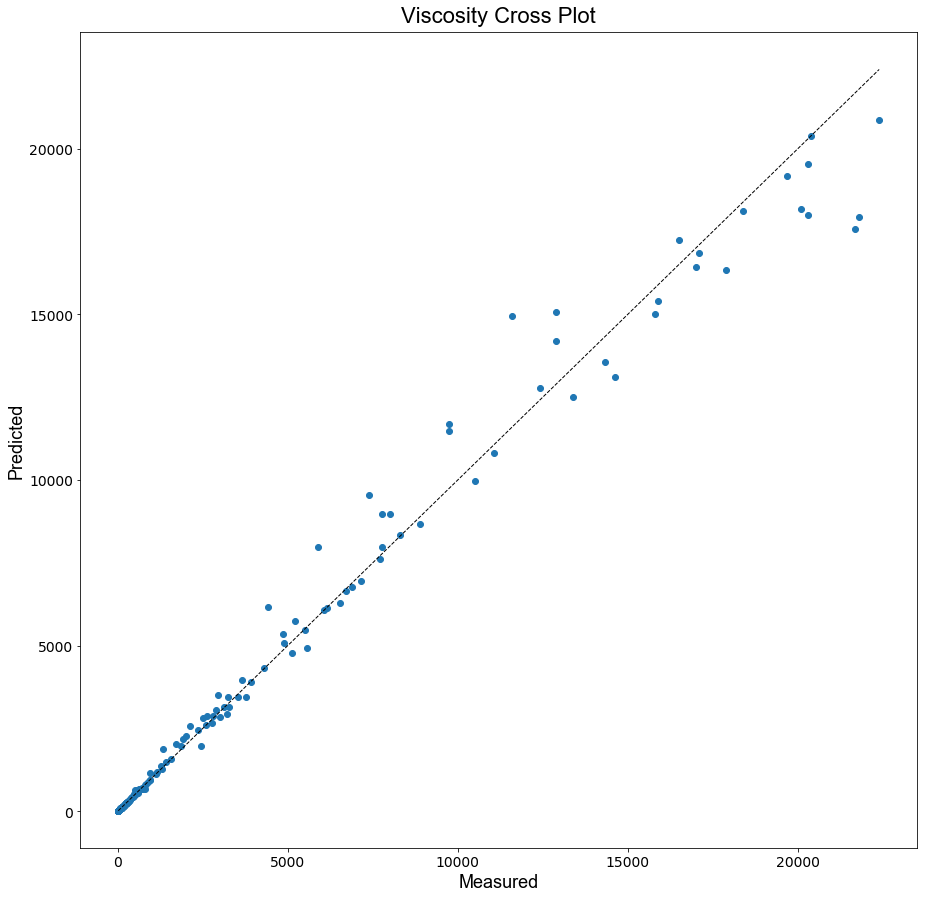

In [36]:
input_cols = ['IBP', 'MW', 'T', 'P']#['T', 'P']#
X = df[input_cols]
y = df.Viscosity

# splitting the samples randomely: 85% training, 15% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)
rf = RandomForestRegressor(n_estimators=5)

r2_rep = 0
for it in range(1, 201):
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    r2_train = metrics.r2_score(y_train, y_train_pred)

    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    r2_test = metrics.r2_score(y_test, y_test_pred)

    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    r2 = metrics.r2_score(y, y_pred)
    
    if r2_test > r2_rep:
        rf_rep = copy.copy(rf)
        r2_rep = r2_test
        print('{0:3d}, test: rmse= {1:.2f}, r2= {2:02f} ==> Better Model'.format(it, rmse_test, r2_test))
    else:
        print('{0:3d}, test: rmse= {1:.2f}, r2= {2:02f}'.format(it, rmse_test, r2_test))
        
y_pred       = rf_rep.predict(X)
y_train_pred = rf_rep.predict(X_train)
y_test_pred  = rf_rep.predict(X_test)

rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2_train = metrics.r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_test = metrics.r2_score(y_test, y_test_pred)

rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
r2 = metrics.r2_score(y, y_pred)
print('\nFinal Model Results\n-----------------')
print('train: rmse= {0:.2f}, r2= {1:02f}'.format(rmse_train, r2_train))
print('test : rmse= {0:.2f}, r2= {1:02f}'.format(rmse_test, r2_test))
print('all  : rmse= {0:.2f}, r2= {1:02f}'.format(rmse, r2))

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured', **axis_font)
ax.set_ylabel('Predicted', **axis_font)
ax.set_title('Viscosity Cross Plot', **title_font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Save the model
import pickle
f = open('ViscosityModel_AllFeatures.pickle', 'wb')   # Pickle file is newly created
pickle.dump(rf_rep, f, -1)          # dump data to f
f.close()

### Feature Importance

[('IBP', 0.030201843608377431), ('MW', 0.0019526763540001677), ('T', 0.91601136553655349), ('P', 0.051834114501068826)]


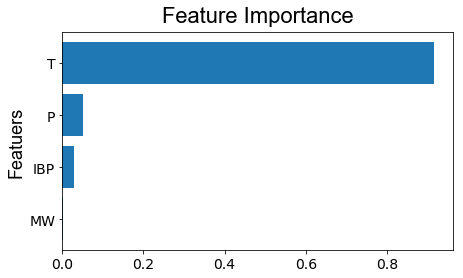

In [37]:
feature_importances = rf_rep.feature_importances_
print(list(zip(input_cols, feature_importances)))
feature_importances_sorted = sorted(feature_importances)
y_ticks_names = [x for _,x in sorted(zip(feature_importances, input_cols))]

y_ticks = range(1,len(feature_importances) + 1)

plt.rcParams['figure.figsize'] = [7, 4]
fig, ax = plt.subplots()
ax.barh(y_ticks, feature_importances_sorted)
plt.yticks(y_ticks, y_ticks_names)
ax.set_ylabel('Featuers', **axis_font)
ax.set_title('Feature Importance', **title_font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<h3>Heatmap of viscosity absolute error<h3>

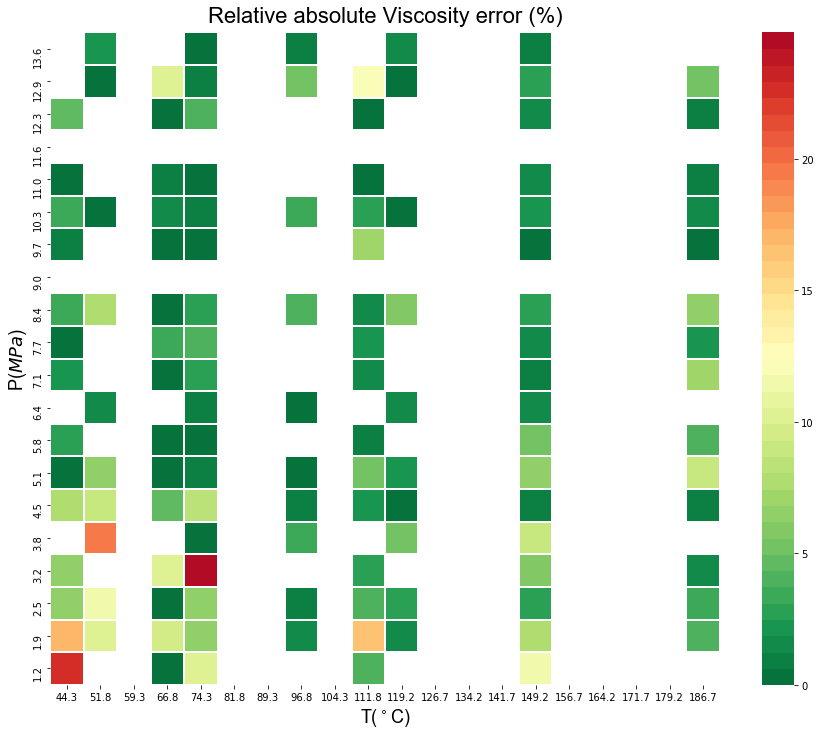

In [38]:
df2 = df
df2['Viscosity_pred'] = rf_rep.predict(X)
df2['Viscosity_err'] = np.abs(df2['Viscosity'] - df2['Viscosity_pred'])

# create the heatmap
min_points_per_grid = 1
divs = 20
T_bins = np.linspace(min(df2['T']), max(df2['T']), divs + 1)
P_bins = np.linspace(min(df2['P']), max(df2['P']), divs + 1)
T_ticks_heatmap = np.round([(T_bins[i-1] + T_bins[i])/2 for i in range(1, len(T_bins))], 1)    
P_ticks_heatmap = np.round([(P_bins[i-1] + P_bins[i])/2 for i in range(1, len(P_bins))], 1)

df_heatmap = df2[['T', 'P', 'Viscosity', 'Viscosity_err']].groupby(
    [pd.cut(df2['T'], bins=T_bins),pd.cut(df2['P'], bins=P_bins)]).aggregate(lambda x: tuple(x))

for i in df_heatmap.index:
    if df_heatmap.loc[i, 'T'] is np.nan or None:
        df_heatmap.loc[i, 'Viscosity_err_median'] = np.nan
    else:
        if len(tuple(df_heatmap.loc[i, 'Viscosity_err'])) >= min_points_per_grid:
            df_heatmap.loc[i, 'Viscosity_err_median'] = np.median(df_heatmap.loc[i, 'Viscosity_err']) / np.median(df_heatmap.loc[i, 'Viscosity']) * 100
        else:
            df_heatmap.loc[i, 'Viscosity_err_median'] = np.nan

fig, ax2 = plt.subplots(figsize=(15, 12))
pal = sns.color_palette("RdYlGn_r", 40)    
ax2 = sns.heatmap(data=np.array(df_heatmap['Viscosity_err_median'].as_matrix()).reshape((divs, divs)),
                  xticklabels=T_ticks_heatmap, yticklabels=P_ticks_heatmap,
                  linewidths=1,
                  cmap=pal)

ax2.invert_yaxis()
ax2.set_xlabel(r"T($^\circ$C)", **axis_font)
ax2.set_ylabel("P($MPa$)", **axis_font)
ax2.set_title("Relative absolute Viscosity error (%)", **title_font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=10)

plt.show()

<h2>Generating a Random Foreset Model with only Temperature and Pressure Featuers</h2>
<h3>Find the best trained model</h3>

  1, test: rmse= 1736.18, r2= 0.919196 ==> Better Model
  2, test: rmse= 2206.48, r2= 0.869490
  3, test: rmse= 2553.93, r2= 0.825152
  4, test: rmse= 2045.26, r2= 0.887865
  5, test: rmse= 2015.08, r2= 0.891150
  6, test: rmse= 2147.99, r2= 0.876318
  7, test: rmse= 2049.52, r2= 0.887397
  8, test: rmse= 2395.14, r2= 0.846218
  9, test: rmse= 2036.77, r2= 0.888794
 10, test: rmse= 2604.45, r2= 0.818166
 11, test: rmse= 1739.57, r2= 0.918880
 12, test: rmse= 2729.63, r2= 0.800266
 13, test: rmse= 1954.21, r2= 0.897626
 14, test: rmse= 2314.62, r2= 0.856384
 15, test: rmse= 2575.56, r2= 0.822177
 16, test: rmse= 2756.09, r2= 0.796375
 17, test: rmse= 1813.06, r2= 0.911881
 18, test: rmse= 2273.82, r2= 0.861403
 19, test: rmse= 1506.43, r2= 0.939166 ==> Better Model
 20, test: rmse= 2257.49, r2= 0.863386
 21, test: rmse= 1642.14, r2= 0.927713
 22, test: rmse= 1737.90, r2= 0.919036
 23, test: rmse= 2449.35, r2= 0.839178
 24, test: rmse= 2525.02, r2= 0.829088
 25, test: rmse= 2416.40, r2= 

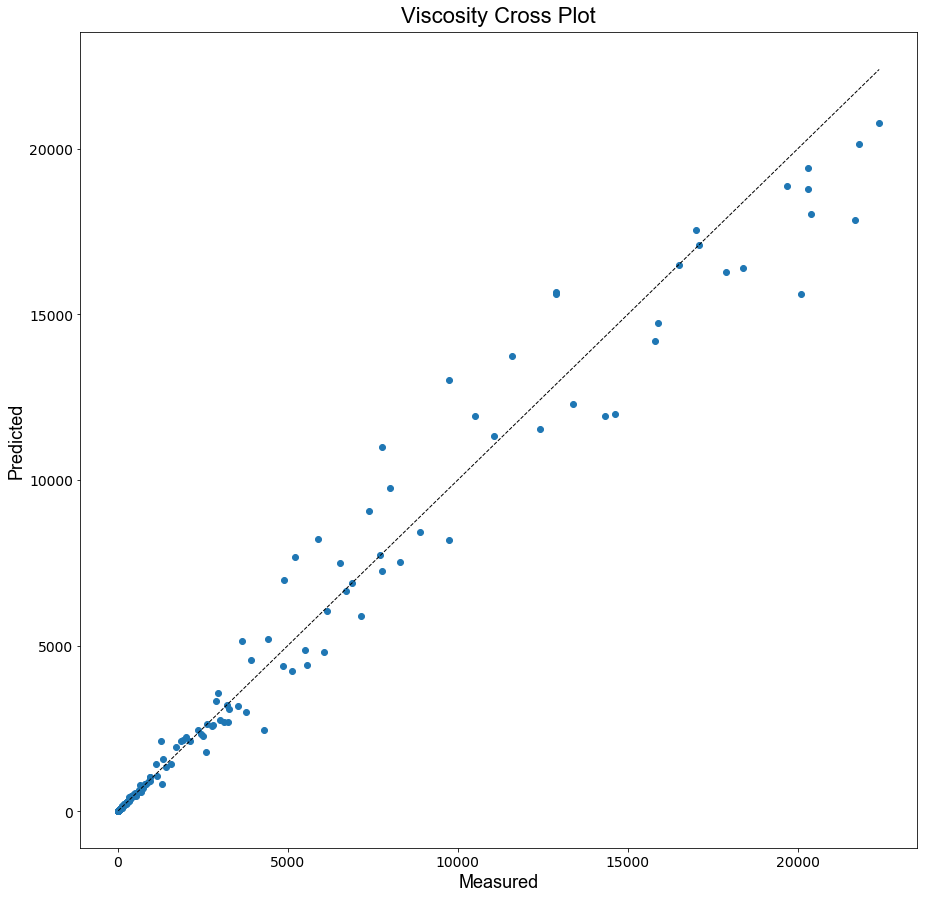

In [66]:
input_cols = ['T', 'P']#['IBP', 'MW', 'T', 'P']#
X = df[input_cols]
y = df.Viscosity

# splitting the samples randomely: 85% training, 15% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)
rf = RandomForestRegressor(n_estimators=5)

r2_rep = 0
for it in range(1, 201):
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    r2_train = metrics.r2_score(y_train, y_train_pred)

    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    r2_test = metrics.r2_score(y_test, y_test_pred)

    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    r2 = metrics.r2_score(y, y_pred)
    
    if r2_test > r2_rep:
        rf_rep = copy.copy(rf)
        r2_rep = r2_test
        print('{0:3d}, test: rmse= {1:.2f}, r2= {2:02f} ==> Better Model'.format(it, rmse_test, r2_test))
    else:
        print('{0:3d}, test: rmse= {1:.2f}, r2= {2:02f}'.format(it, rmse_test, r2_test))
        
y_pred       = rf_rep.predict(X)
y_train_pred = rf_rep.predict(X_train)
y_test_pred  = rf_rep.predict(X_test)

rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2_train = metrics.r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_test = metrics.r2_score(y_test, y_test_pred)

rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
r2 = metrics.r2_score(y, y_pred)
print('\nFinal Model Results\n-----------------')
print('train: rmse= {0:.2f}, r2= {1:02f}'.format(rmse_train, r2_train))
print('test : rmse= {0:.2f}, r2= {1:02f}'.format(rmse_test, r2_test))
print('all  : rmse= {0:.2f}, r2= {1:02f}'.format(rmse, r2))

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured', **axis_font)
ax.set_ylabel('Predicted', **axis_font)
ax.set_title('Viscosity Cross Plot', **title_font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Save the model
import pickle
f = open('ViscosityModel_T_and_P_Features.pickle', 'wb')   # Pickle file is newly created
pickle.dump(rf_rep, f, -1)          # dump data to f
f.close()

<h3>Feature Importance</h3>

[('T', 0.92303079793003762), ('P', 0.07696920206996237)]


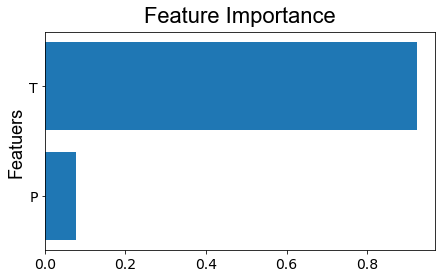

In [67]:
feature_importances = rf_rep.feature_importances_
print(list(zip(input_cols, feature_importances)))
feature_importances_sorted = sorted(feature_importances)
y_ticks_names = [x for _,x in sorted(zip(feature_importances, input_cols))]

y_ticks = range(1,len(feature_importances) + 1)

plt.rcParams['figure.figsize'] = [7, 4]
fig, ax = plt.subplots()
ax.barh(y_ticks, feature_importances_sorted)
plt.yticks(y_ticks, y_ticks_names)
ax.set_ylabel('Featuers', **axis_font)
ax.set_title('Feature Importance', **title_font)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<h3>Heatmap of viscosity absolute error<h3>

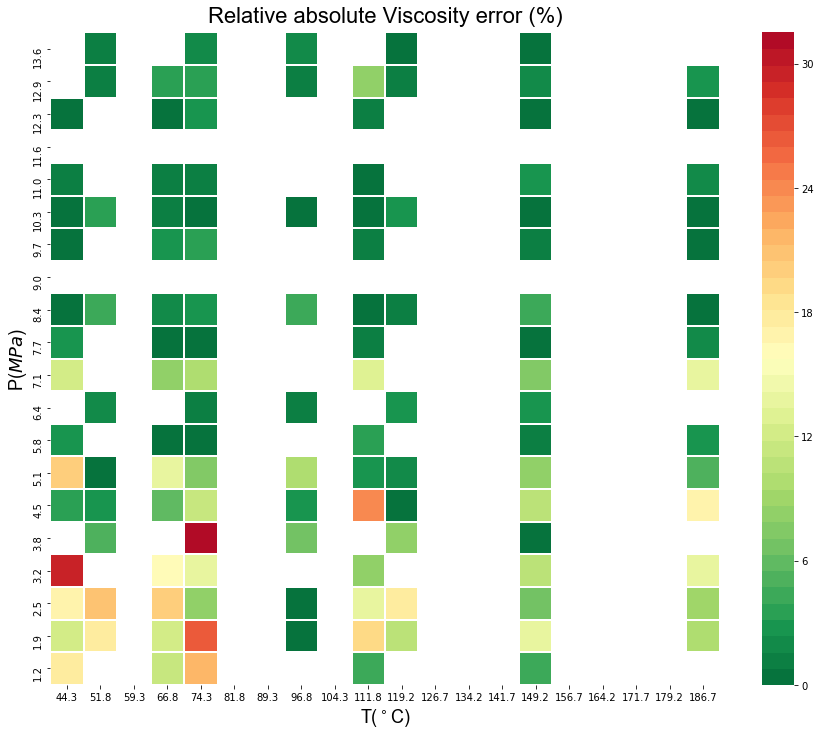

In [68]:
df2 = df
df2['Viscosity_pred'] = rf_rep.predict(X)
df2['Viscosity_err'] = np.abs(df2['Viscosity'] - df2['Viscosity_pred'])

# create the heatmap
min_points_per_grid = 1
divs = 20
T_bins = np.linspace(min(df2['T']), max(df2['T']), divs + 1)
P_bins = np.linspace(min(df2['P']), max(df2['P']), divs + 1)
T_ticks_heatmap = np.round([(T_bins[i-1] + T_bins[i])/2 for i in range(1, len(T_bins))], 1)    
P_ticks_heatmap = np.round([(P_bins[i-1] + P_bins[i])/2 for i in range(1, len(P_bins))], 1)

df_heatmap = df2[['T', 'P', 'Viscosity', 'Viscosity_err']].groupby(
    [pd.cut(df2['T'], bins=T_bins),pd.cut(df2['P'], bins=P_bins)]).aggregate(lambda x: tuple(x))

for i in df_heatmap.index:
    if df_heatmap.loc[i, 'T'] is np.nan or None:
        df_heatmap.loc[i, 'Viscosity_err_median'] = np.nan
    else:
        if len(tuple(df_heatmap.loc[i, 'Viscosity_err'])) >= min_points_per_grid:
            df_heatmap.loc[i, 'Viscosity_err_median'] = np.median(df_heatmap.loc[i, 'Viscosity_err']) / np.median(df_heatmap.loc[i, 'Viscosity']) * 100
        else:
            df_heatmap.loc[i, 'Viscosity_err_median'] = np.nan

fig, ax2 = plt.subplots(figsize=(15, 12))
pal = sns.color_palette("RdYlGn_r", 40)    
ax2 = sns.heatmap(data=np.array(df_heatmap['Viscosity_err_median'].as_matrix()).reshape((divs, divs)),
                  xticklabels=T_ticks_heatmap, yticklabels=P_ticks_heatmap,
                  linewidths=1,
                  cmap=pal)

ax2.invert_yaxis()
ax2.set_xlabel(r"T($^\circ$C)", **axis_font)
ax2.set_ylabel("P($MPa$)", **axis_font)
ax2.set_title("Relative absolute Viscosity error (%)", **title_font)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=10)

plt.show()

<h2>Conclusion</h2>
<p>Two models are developed for the viscosity. As it can been seen temperature is the dominant feature among the others, and then pressure and inital boiling point. Molecular weight of the bitumen doesn't have any effect on the viscosity. Because the temperature and pressure has the highest effect on the viscoisty and are usually available, the second model has been developed with these two featuers and it shows reasonable accuracy.</p>